<a href="https://colab.research.google.com/github/kai-v/ImageEnhancement/blob/main/ImageEnhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp
import PIL as pl
from PIL import Image
import cv2


Used to Convert images to Black and White 

In [191]:
def BW(image,file_path):
  im = cv2.imread(image)
  gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  cv2.imwrite(file_path,gray)


BW('/media/test1.jpg','/media/test1bw.jpg')


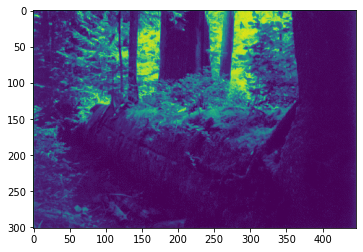

In [192]:
#Change the images paths to test on diffrent images here 
image_path = "/media/forestbw.tif"
target_image = "/media/source1.jpg"
f1 = mp.imread(image_path)
plt.imshow(f1)

Equalise the image Histograms 

In [193]:
def equalise(source,template):
  im1 = cv2.imread(source,0)
  im2 = cv2.imread(template,0)

  equ1 = cv2.equalizeHist(im1)
  equ2 = cv2.equalizeHist(im2)
  return equ1,equ2

In [198]:
def histogram_matching(input,target):

    #Equalise the Image Histograms
    equ1,equ2 = equalise(input,target)

    #Convert the images into numpy arrays 
    source = np.array(equ1)
    match = np.array(equ2)

    oldshape = source.shape

    source = source.ravel()
    match = match.ravel()

    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    m_values, m_counts = np.unique(match, return_counts=True)

    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    m_quantiles = np.cumsum(m_counts).astype(np.float64)
    m_quantiles /= m_quantiles[-1]


    interp_m_values = np.interp(s_quantiles, m_quantiles, m_values)

    return interp_m_values[bin_idx].reshape(oldshape)

Target Image and Histogarm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


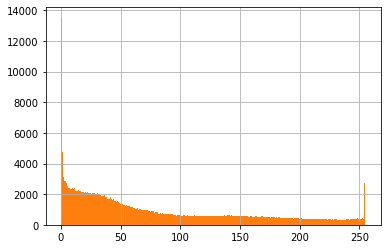

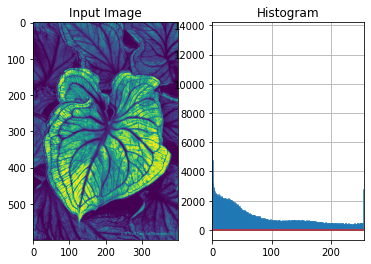

In [195]:
mu, sigma = 100, 10
x = mu + sigma * np.random.randn(10000)
plt.hist(x, bins=50); plt.grid()

f = mp.imread(target_image)

plt.figure(1)
imhist = plt.hist(f.flatten(),256,[0,255]) 
plt.figure(2);
plt.subplot(1,2,1); 
plt.imshow(f); plt.title("Input Image")
plt.subplot(1,2,2);
plt.stem(np.arange(256), imhist[0], markerfmt=" "); plt.title("Histogram"); plt.xlim(0, 256); plt.grid()

Soirce Image after Applying the Histogarm Matching Algorithm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


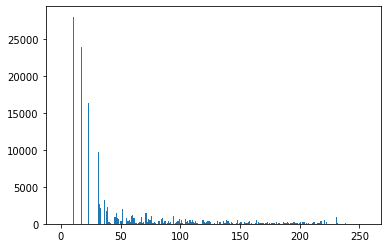

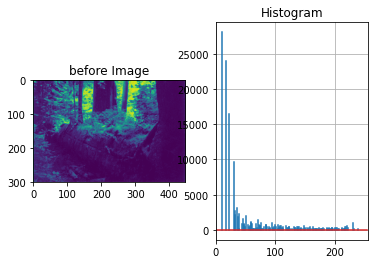

In [196]:
before = mp.imread(image_path)

plt.figure(1)
imhist = plt.hist(before.flatten(),256,[0,255]) 
plt.figure(2);
plt.subplot(1,2,1); 
plt.imshow(before); plt.title("before Image")
plt.subplot(1,2,2);
plt.stem(np.arange(256), imhist[0], markerfmt=" "); plt.title("Histogram"); plt.xlim(0, 256); plt.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


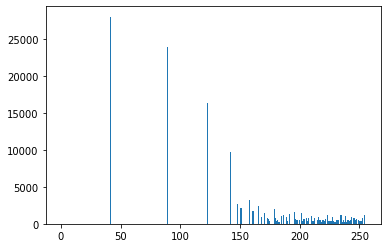

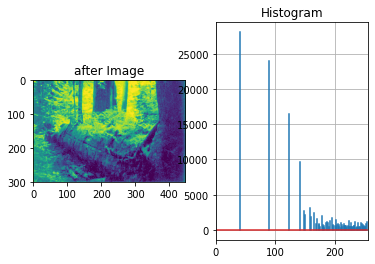

In [197]:
matched = histogram_matching(image_path,target_image)

plt.figure(1)
imhist = plt.hist(matched.flatten(),256,[0,255]) 
plt.figure(2);
plt.subplot(1,2,1); 
plt.imshow(matched); plt.title("after Image")
plt.subplot(1,2,2);
plt.stem(np.arange(256), imhist[0], markerfmt=" "); plt.title("Histogram"); plt.xlim(0, 256); plt.grid()